In [1]:
''' Latin hypercube design
Installation: pip install --upgrade pyDOE
https://pythonhosted.org/pyDOE/randomized.html

import sys
!{sys.executable} -m pip install --upgrade pyDOE

'''
import numpy as np
from matplotlib import pyplot as plt
import pyDOE as pyDOE

def rescale01(xmin, xmax, f):
    return (f - xmin) / (xmax - xmin)


In [2]:
num_evals = [32, 64, 128, 256, 512, 1024][0]  ## Total number of evaluations for training the emulator
num_para = [3, 4, 5, 6, 7][0]
design = ['latin', 'random', 'grid'][0]

In [3]:
#### Parameters -- replace this and the limits #####

####  para = np.linspace(lower_lim, upper_lim, total_eval)

para1 = np.linspace(0.0, 0.62036, num_evals)  #OmegaM
para2 = np.linspace(0.1841, 0.4159, num_evals) #Omegab
para3 = np.linspace(1.2886, 2.9114, num_evals) # sigma8

allPara = np.vstack([para1, para2, para3])

In [4]:

def latinHyp(allParams, paramOutfile):
    np.random.seed(421)
    lhd = pyDOE.lhs(allParams.shape[0], samples=num_evals, criterion=None) # c cm corr m
#     print(lhd)
    # lhd = norm(loc=0, scale=1).ppf(lhd)  # this applies to both factors here
    idx = (lhd * num_evals).astype(int)

    allCombinations = np.zeros((num_evals, allParams.shape[0]))
    for i in range(allParams.shape[0]):
        allCombinations[:, i] = allParams[i][idx[:, i]]

    np.savetxt(paramOutfile, allCombinations)
    return allCombinations, lhd
#         print(allCombinations)
        
        
Outfile = design + '_para' + str(num_para) + '_total' + str(num_evals)
allparams, lhd = latinHyp(allPara,  'Designs/' + Outfile + '.txt' )
        

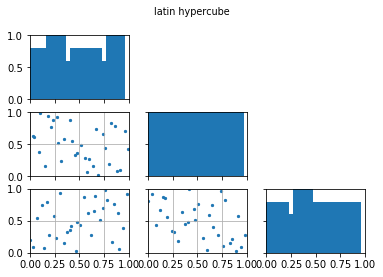

In [5]:
##
f, a = plt.subplots(allPara.shape[0], allPara.shape[0], sharex=True, sharey=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
plt.rcParams.update({'font.size': 8})
plt.suptitle('latin hypercube')
for i in range(allPara.shape[0]):
    for j in range(i+1):
#         print(i,j)
        if(i>j):
            a[i, j].scatter(lhd[:, i], lhd[:, j], s=5)
            a[i, j].grid(True)
            
        if(j<i):
            plt.delaxes(a[j, i])
        else:
            # a[i,i].set_title(AllLabels[i])
            # a[i, i].text(0.4, 0.4, AllLabels[i], size = 'xx-large')
            hist, bin_edges = np.histogram(lhd[:,i], density=True, bins=8)
            # a[i,i].bar(hist)
            a[i,i].bar(bin_edges[:-1], hist/hist.max(), width=0.2)
            plt.xlim(0,1)
            plt.ylim(0,1)


plt.savefig('Plots/' + Outfile + '.png', figsize=(10, 10))
plt.show()

In [14]:
design = ['latin', 'random', 'grid'][1]


def randomDesign(allParams, paramOutfile):

    
    ## THIS NEEDS TO BE EDITED TO ACCOUNT FOR DIFFERENT #params
#     np.random.seed(32)
#     rnd0 = np.random.uniform(0, 1, num_evals)
#     np.random.seed(31)
#     rnd1 = np.random.uniform(0, 1, num_evals)
#     np.random.seed(33)
#     rnd2 = np.random.uniform(0, 1, num_evals)
#     rnd = np.vstack([rnd0, rnd1, rnd2]).T


    ## CHECK if it's uniform in every direction
    np.random.seed(313)
    rnd = np.random.uniform(0, 1, (num_evals, allParams.shape[0]) )
    
    idx = (rnd * num_evals).astype(int)
    
    allCombinations = np.zeros((num_evals, allParams.shape[0]))
    for i in range(allParams.shape[0]):
        allCombinations[:, i] = allParams[i][idx[:, i]]

    np.savetxt(paramOutfile, allCombinations)
    return allCombinations, rnd

#         print(allCombinations)
        
        
Outfile = design + '_para' + str(num_para) + '_total' + str(num_evals)
allparams, rnd = randomDesign(allPara,  'Designs/' + Outfile + '.txt' )

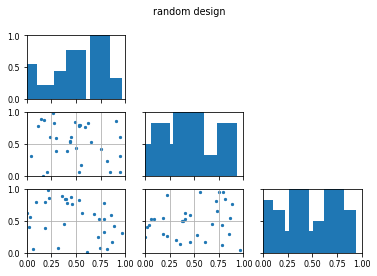

In [15]:
##
f, a = plt.subplots(allPara.shape[0], allPara.shape[0], sharex=True, sharey=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
plt.rcParams.update({'font.size': 8})
plt.suptitle('random design')
for i in range(allPara.shape[0]):
    for j in range(i+1):
#         print(i,j)
        if(i>j):
            a[i, j].scatter(rnd[:, i], rnd[:, j], s=5)
            a[i, j].grid(True)
        if(j<i):
            plt.delaxes(a[j, i])
        else:
            # a[i,i].set_title(AllLabels[i])
            # a[i, i].text(0.4, 0.4, AllLabels[i], size = 'xx-large')
            hist, bin_edges = np.histogram(rnd[:,i], density=True, bins=8)
            # a[i,i].bar(hist)
            a[i,i].bar(bin_edges[:-1], hist/hist.max(), width=0.2)
            plt.xlim(0,1)
            plt.ylim(0,1)
            


plt.savefig('Plots/' + Outfile + '.png', figsize=(10, 10))
plt.show()

In [16]:
design = ['latin', 'random', 'grid'][2]


def gridDesign(allParams, paramOutfile):

    np.random.seed(313)
    grd = np.random.uniform(0, 1, (num_evals, allParams.shape[0]) )
    
    idx = (grd * num_evals).astype(int)
    
    allCombinations = np.zeros((num_evals, allParams.shape[0]))
    for i in range(allParams.shape[0]):
        allCombinations[:, i] = allParams[i][idx[:, i]]

    np.savetxt(paramOutfile, allCombinations)
    return allCombinations, grd

#         print(allCombinations)
        
        
Outfile = design + '_para' + str(num_para) + '_total' + str(num_evals)
allparams, grd = randomDesign(allPara,  'Designs/' + Outfile + '.txt' )

array([[1.65539624e-01, 5.50104366e-01, 8.60871802e-01],
       [6.17933724e-01, 9.46246387e-01, 5.60857972e-01],
       [8.69587486e-01, 1.72400475e-01, 4.52217029e-01],
       [5.26132667e-01, 4.36334150e-01, 7.82979111e-01],
       [5.92108205e-01, 2.99454694e-01, 8.51411084e-01],
       [6.55452150e-02, 5.28919810e-01, 6.02019576e-02],
       [7.62914680e-01, 5.88702606e-01, 4.57964824e-01],
       [3.84688917e-01, 2.93848309e-01, 1.79845171e-01],
       [6.17330867e-01, 2.39476073e-01, 2.10697447e-04],
       [7.82183621e-01, 5.25643385e-01, 4.04801539e-01],
       [6.12077635e-01, 4.51273873e-01, 6.84447790e-01],
       [8.54061617e-01, 9.03409250e-01, 2.21380403e-01],
       [8.92342499e-01, 1.40422463e-01, 3.58637230e-01],
       [4.43466554e-01, 4.95260514e-01, 3.74235143e-01],
       [3.19800262e-01, 9.47949633e-01, 7.88143589e-01],
       [9.87244735e-01, 2.69112328e-01, 2.19514711e-01],
       [8.27563430e-01, 2.79553223e-01, 5.25809824e-01],
       [3.06753451e-01, 4.52222